<a href="https://colab.research.google.com/github/AmirKh20/Wine-Quality/blob/master/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Dataset

In this lab i used the [Red and White Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality) datasets from UCI Machine learning repository. The details are described in [Cortez et al., 2009].
It's two datasets about red and white wine quality. These two datasets were created, using red and white wine samples.

  The inputs include objective tests (e.g. PH values) and the output is based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality  between 0 (very bad) and 10 (very excellent).

## Citation
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

# Objective

My objective here is to build some classification models for predicting good wines from bad wines, and compare them to get the best model, then look at it's feature importances to see which features are the most important in wine quality and how they are important!

Let's go!

# Reading and understanding our data

First we need to read the datasets using pandas:

In [ ]:
import pandas as pd

dataset_redwine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
dataset_whitewine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=';')

## Attrubute information


For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1. fixed acidity
   2. volatile acidity
   3. citric acid
   4.  residual sugar
   5.  chlorides
   6.  free sulfur dioxide
   7.  total sulfur dioxide
   8.  density
   9.  pH
   10.  sulphates
   11.  alcohol

   Output variable (based on sensory data):
   12. quality (score between 0 and 10)

We can also look at the description of the datasets and their attributes using cURL command:

In [ ]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

Then we can look at the top 5 rows of the two datasets:

In [ ]:
dataset_redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dataset_whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


And some statistics:

In [ ]:
dataset_whitewine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [ ]:
dataset_redwine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


We can see from above we have 1599 red wines and 4898 white wines
Also we can find out that total sulfur dioxide in white wines is higher than red wines. except this one, other features have mostly the same mean.

## Combining two datasets

Then we want to combine these two datasets into one, so we have a dataset that has both red and white wines

But first we should check if all the columns in these two datasets are all the same:

In [ ]:
(dataset_redwine.columns == dataset_whitewine.columns).all()

True

Now we have to add a column to each datasets to distingushe the red wines from the white wines:

In [ ]:
dataset_redwine['color'] = "red"

In [ ]:
dataset_whitewine['color'] = 'white'

Now we combine(concatenate) Red wine quality and White wine quality datasets using `pd.concat()`.

Also we set the `ignore_index` arugument to `True` so their respective indexes wont get preserved.

In [ ]:
data = pd.concat([dataset_redwine, dataset_whitewine], ignore_index=True)

Now look at a 5 row sample of this combined dataset:

In [ ]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
3072,7.0,0.200,0.49,5.9,0.038,39.0,128.0,0.99380,3.21,0.48,10.8,6,white
5654,6.8,0.300,0.27,11.6,0.028,22.0,97.0,0.99314,2.96,0.38,11.7,6,white
4467,6.2,0.230,0.23,1.2,0.018,18.0,128.0,0.99178,3.05,0.28,10.6,5,white
1743,8.1,0.200,0.40,2.0,0.037,19.0,87.0,0.99210,3.12,0.54,11.2,6,white
1376,8.2,0.885,0.20,1.4,0.086,7.0,31.0,0.99460,3.11,0.46,10.0,5,red


And some statistics:

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,NaN,NaN,NaN,7.215307,1.296434,3.8,6.4,7.0,7.7,15.9
volatile acidity,6497.0,NaN,NaN,NaN,0.339666,0.164636,0.08,0.23,0.29,0.4,1.58
citric acid,6497.0,NaN,NaN,NaN,0.318633,0.145318,0.0,0.25,0.31,0.39,1.66
residual sugar,6497.0,NaN,NaN,NaN,5.443235,4.757804,0.6,1.8,3.0,8.1,65.8
chlorides,6497.0,NaN,NaN,NaN,0.056034,0.035034,0.009,0.038,0.047,0.065,0.611
free sulfur dioxide,6497.0,NaN,NaN,NaN,30.525319,17.7494,1.0,17.0,29.0,41.0,289.0
total sulfur dioxide,6497.0,NaN,NaN,NaN,115.744574,56.521855,6.0,77.0,118.0,156.0,440.0
density,6497.0,NaN,NaN,NaN,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,NaN,NaN,NaN,3.218501,0.160787,2.72,3.11,3.21,3.32,4.01
sulphates,6497.0,NaN,NaN,NaN,0.531268,0.148806,0.22,0.43,0.51,0.6,2.0


Here we can see that our features are not in the same scale. Also there are some outliers in our features

# EDA

## Check null values

We can count the number of red and white wines to check if all of them are here and there is not any null value:

In [ ]:
(data[data.color == 'red'].count() == dataset_redwine.shape[0]).all()

True

In [ ]:
(data[data.color == 'white'].count() == dataset_whitewine.shape[0]).all()

True

Also to check if there is any null values in our columns:

In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

Looks like we don't have any null values! good.

## Check Duplicates

To see if we have any duplicates in our dataset:

In [ ]:
data.duplicated().sum()

1177

We see that there are 1177 Duplicates in our dataset!

Let's look at some of them:

In [ ]:
data[data.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,red
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,red
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5,red
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5,red
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.900000,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427,6.4,0.230,0.35,10.30,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5,white
6449,7.0,0.360,0.35,2.50,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6,white
6450,6.4,0.330,0.44,8.90,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5,white
6455,7.1,0.230,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,white


And to see an example of a duplicate:

In [ ]:
data[(data.index == 0) | (data.index == 4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Here we see we have exactly identical records in our dataset!

There was a liitle bit of an argument for this to remove the duplicates or not. But I decided to remove them since the same records can get into both training and test set. And that's data leakage, and it would give us fake scores!

We can drop the duplicates using this:

In [ ]:
data.drop_duplicates(inplace=True, ignore_index=True)

## Charts

Then let's look at some charts for our features to underestand them better!

### Box Plot

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

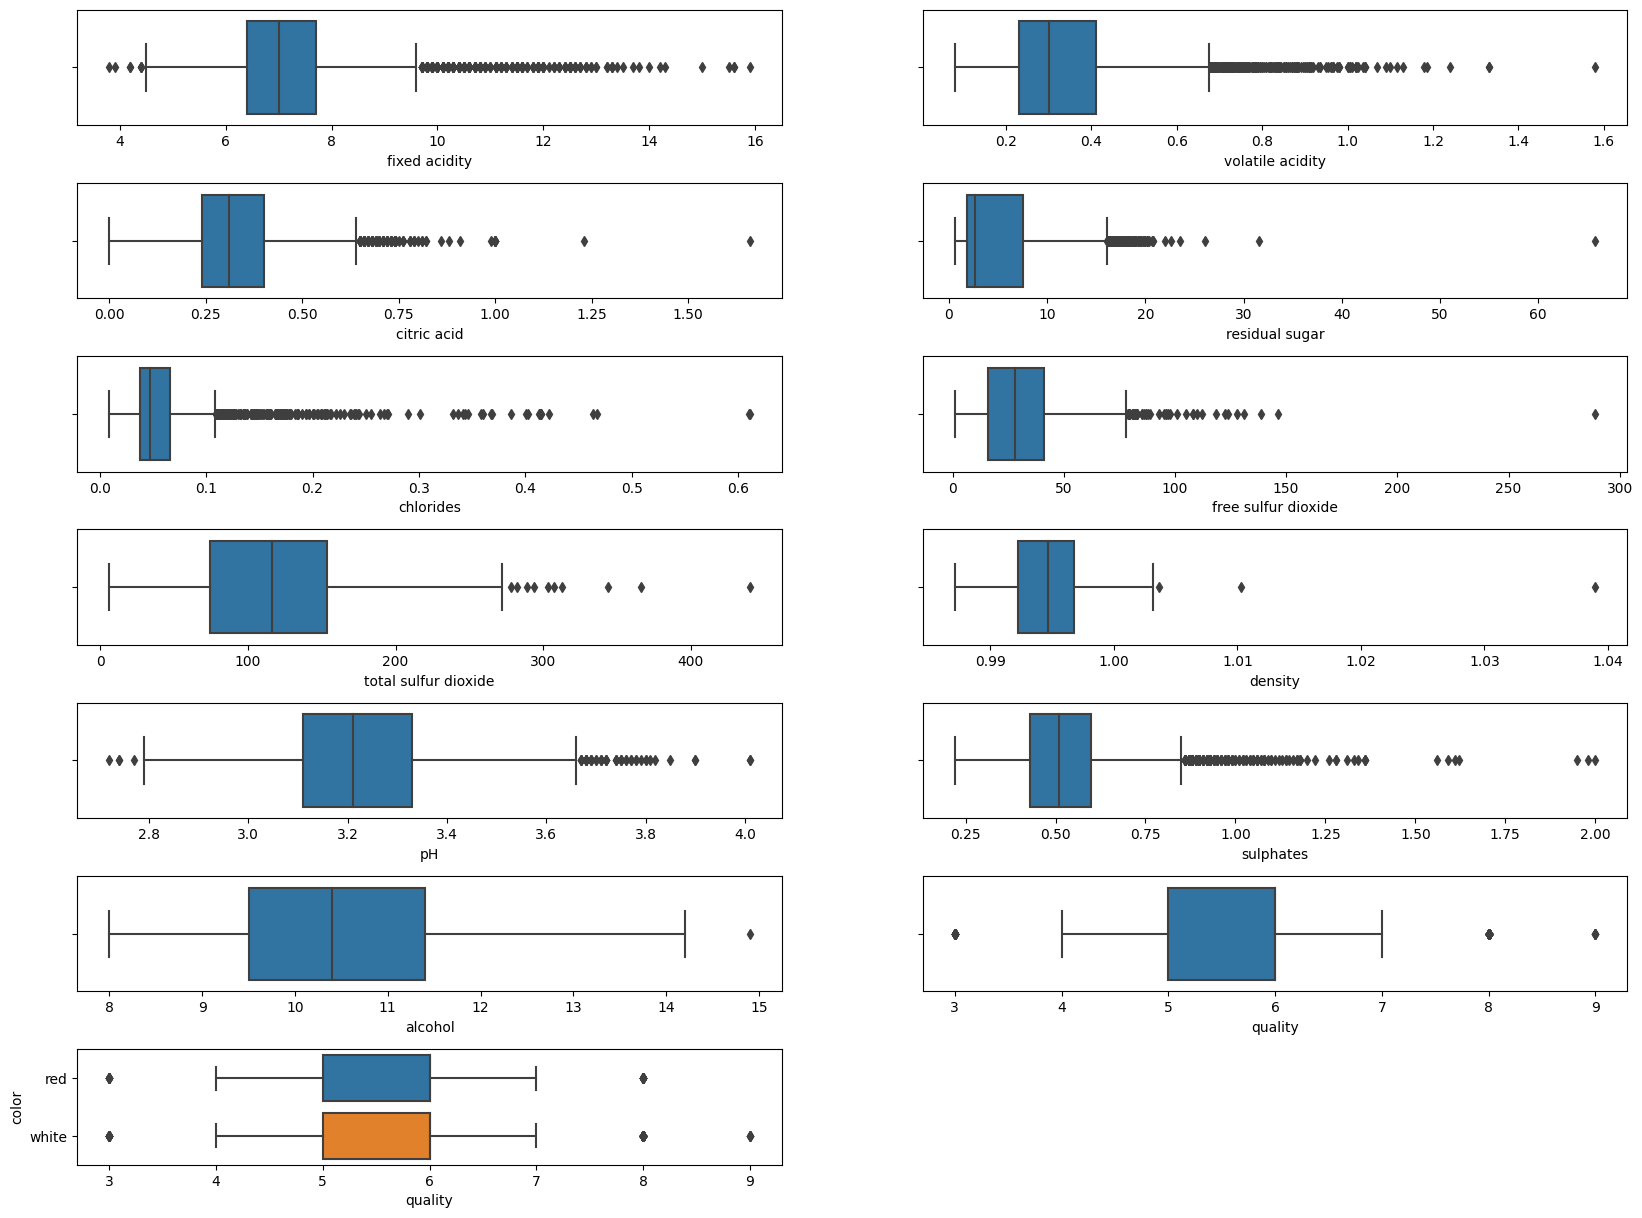

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(20, 15))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5)
axes[-1].axis('off')

for i, ax in enumerate(axes):
    if ax == axes[-2]:
        sns.boxplot(x='quality', y='color', data=data, ax=ax)
        break
    sns.boxplot(x=data.columns[i], data=data, ax=ax)

Looks like there are many outlier in our dataset. So we better use a scaler that is robust to outlier later on.

Also we can see that our features are not in the same scale.

### Pair Plots

Next We look at the scatter plots between features and their distribution based on their colors, with `pairplot` method we can achive this:

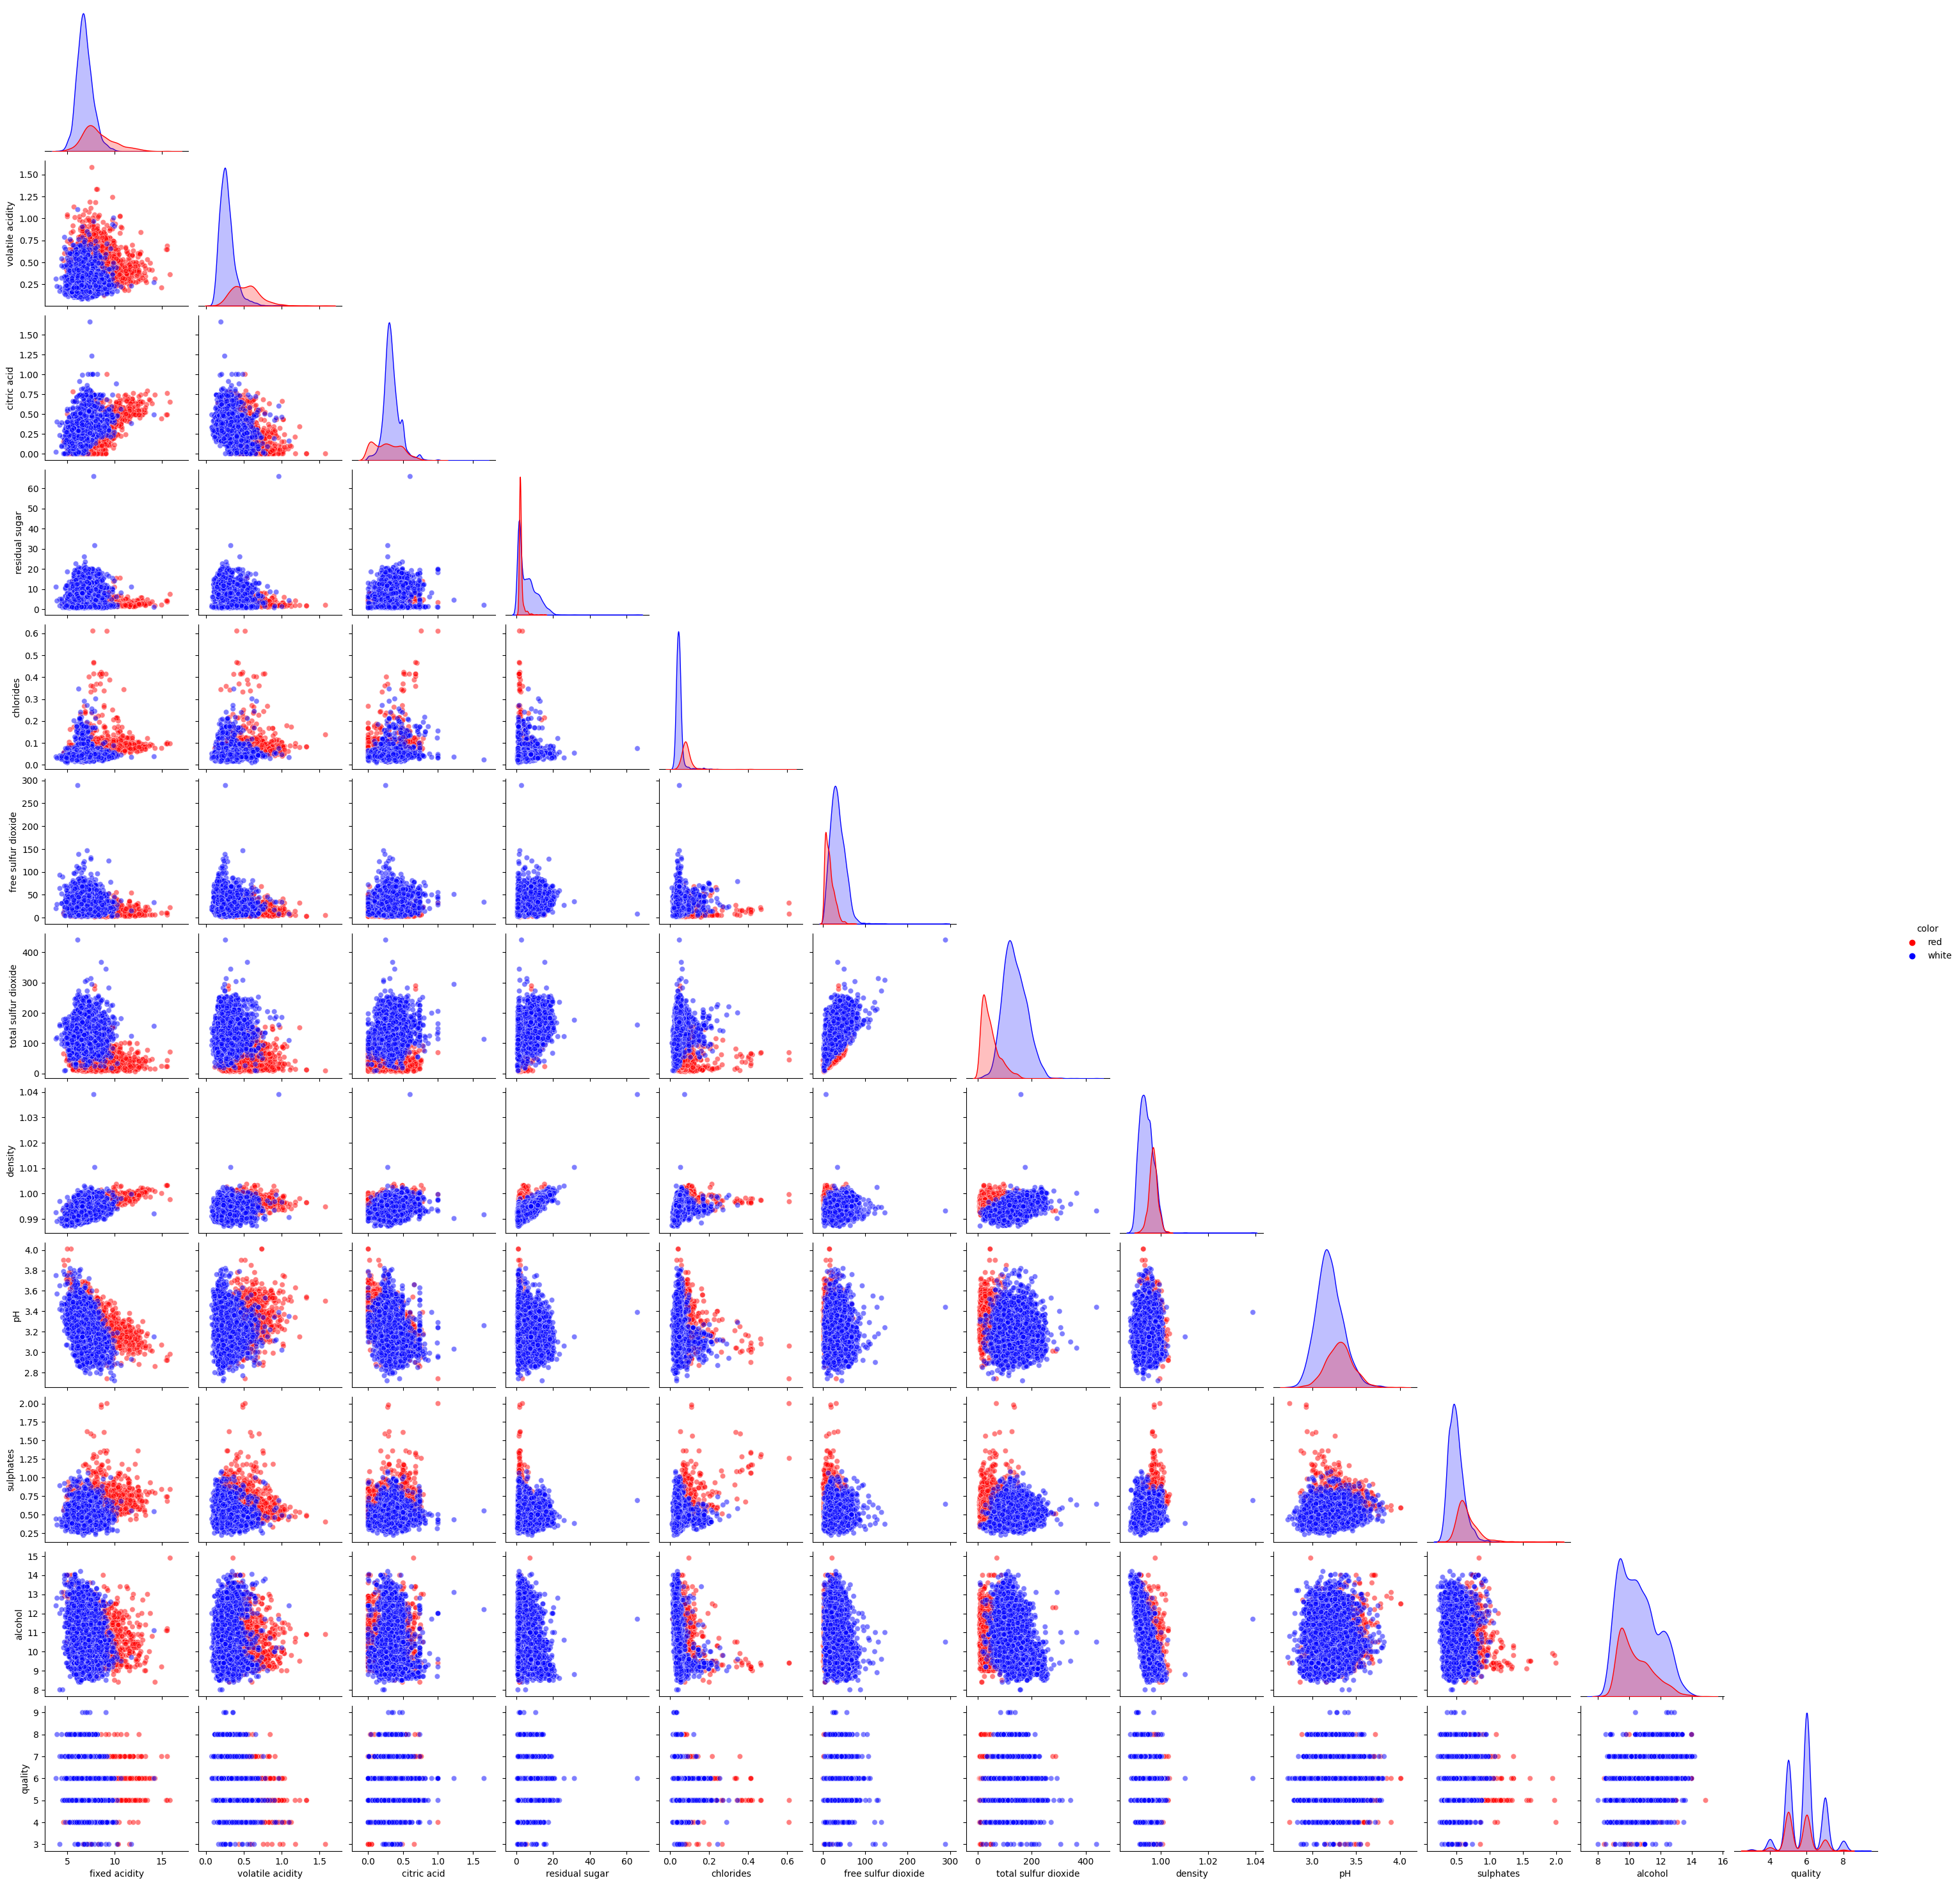

In [ ]:
sns.pairplot(data, hue='color', corner=True, palette={'red': 'red', 'white': 'blue'}, plot_kws={'alpha': 0.5})

You could draw many information from pariplots. Like in this pairplot we see many of our features are skewed and are not normally distributed. This can be a problem for some models like logistic regression that expect features to be normaly distributed.

Also there are many correlation between our features.

## Skewness

Check the skewness of our features:

In [ ]:
data.iloc[:, :-2].skew().sort_values(ascending=False)

chlorides               5.338237
sulphates               1.809454
residual sugar          1.706550
fixed acidity           1.650417
volatile acidity        1.504557
free sulfur dioxide     1.362719
density                 0.666326
alcohol                 0.545696
citric acid             0.484309
pH                      0.389969
total sulfur dioxide    0.063614
dtype: float64

Many of our features are highly right skewed!

Lets do some transformation on them see if it can help and choose the right transformation for our preprocessor!

In [ ]:
import numpy as np

In [ ]:
data.iloc[:, :-2].apply(np.log1p).skew().sort_values(ascending=False)

chlorides               4.454417
volatile acidity        1.129754
sulphates               1.105092
fixed acidity           0.928510
density                 0.643925
residual sugar          0.513476
alcohol                 0.375854
pH                      0.264272
citric acid            -0.092709
free sulfur dioxide    -0.678781
total sulfur dioxide   -1.308301
dtype: float64

Log transformation did not really help!

In [ ]:
data.iloc[:, :-2].apply(np.sqrt).skew().sort_values(ascending=False)

chlorides               2.450636
fixed acidity           1.228680
sulphates               0.972874
volatile acidity        0.893241
residual sugar          0.839096
density                 0.644005
alcohol                 0.452102
pH                      0.307416
free sulfur dioxide     0.081926
total sulfur dioxide   -0.604019
citric acid            -1.221456
dtype: float64

Also for sqrt transformation!

Lets try a power transformer next time:

In [ ]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

In [ ]:
pt = PowerTransformer()
sorted(skew(pt.fit_transform(data.iloc[:, :-2])))

[-0.1630688446697577,
 -0.05431543571955147,
 -0.033884975474281806,
 -0.0023294162175321,
 0.0037645902078775003,
 0.008462153139230719,
 0.06244357049802393,
 0.07366028935806605,
 0.11507534915808523,
 0.15857151811947512,
 0.20788489883125405]

NICE! Many of our skewness are now close to zero!

### Hist Plots

Lets look at histogram plots to see visually that our features are not skewed anymore!

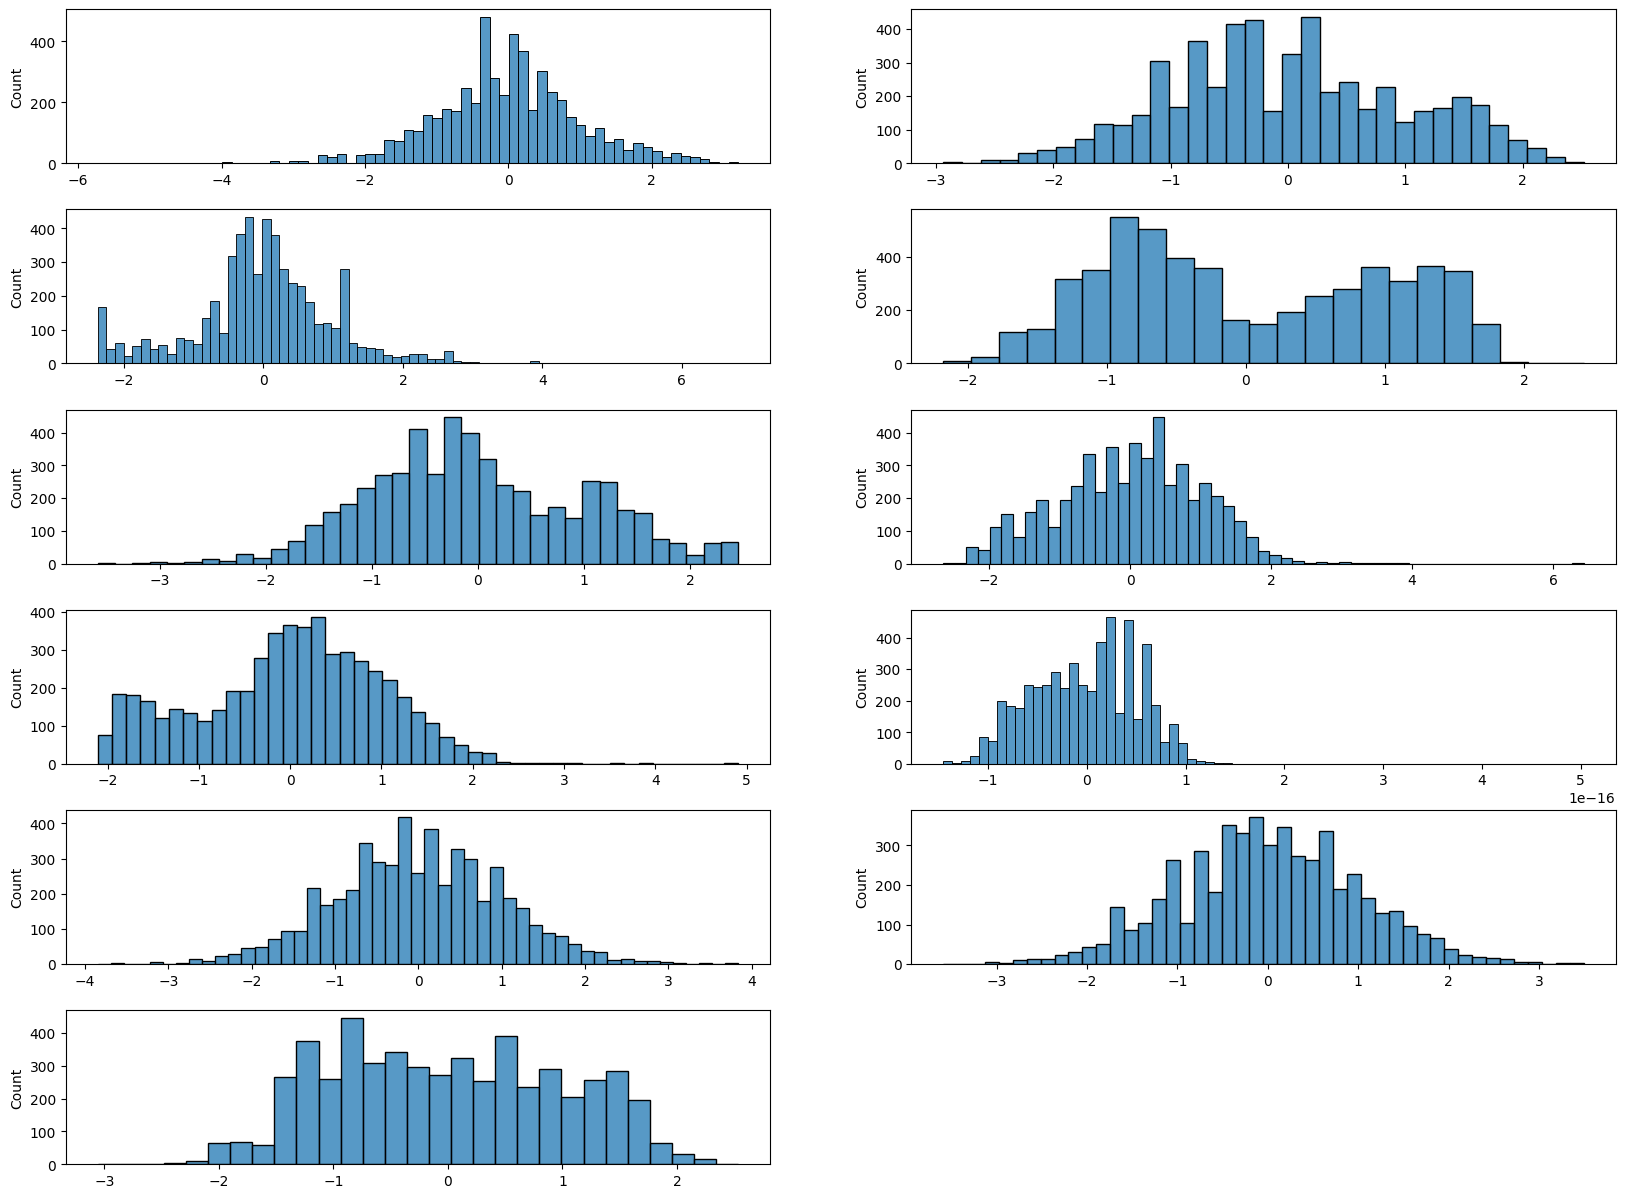

In [ ]:
_, axes = plt.subplots(6, 2, figsize=(20, 15))
axes = axes.flatten()
axes[-1].axis('off')
plt.subplots_adjust(hspace=0.3)

for i, ax in enumerate(axes[:-1]):
    sns.histplot(pt.fit_transform(data.iloc[:, :-2])[:, i], ax=ax)

Yes! we can use this power transformer later on!

## Correlations

Lets divide our dataset in two, then look at the correlations between our features, also between the features and target variables.

In [ ]:
X = data.drop('quality', axis=1)
y = data['quality']

### Red wine

First let's see the most corralted features in red wines with our target variable:

In [ ]:
corr_red = dataset_redwine.corrwith(dataset_redwine['quality']).sort_values(ascending=False)[1:]
corr_red

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
dtype: float64

`Alcohol`, `volatile acidity`, `sulphates` and `citric acid` are the most correlated features with the `quality` of red wines.

And the least correlated features are `residual sugar` and `free sulfur dioxide`.

### White wine

In [ ]:
corr_white = dataset_whitewine.corrwith(dataset_whitewine['quality']).sort_values(ascending=False)[1:]
corr_white

alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
dtype: float64

This time `alcohol`, `density` and `chlorides` are the most correlated features.

And the least correlated features are `free sulfar dioxide` and `citric acid`.

### Whole dataset

Now on the whole dataset:

In [ ]:
X.corrwith(y).abs().sort_values(ascending=False)

alcohol                 0.469422
density                 0.326434
volatile acidity        0.265205
chlorides               0.202137
citric acid             0.097954
fixed acidity           0.080092
residual sugar          0.056830
free sulfur dioxide     0.054002
total sulfur dioxide    0.050296
sulphates               0.041884
pH                      0.039733
dtype: float64

`alcohol`, `density`, `volatile acidity`, `chlorides` are the highets correlated ones, And `ph`, `sulphates` and `total sulfur dioxide` are the least correlated features.

#### Heat map

<Axes: >

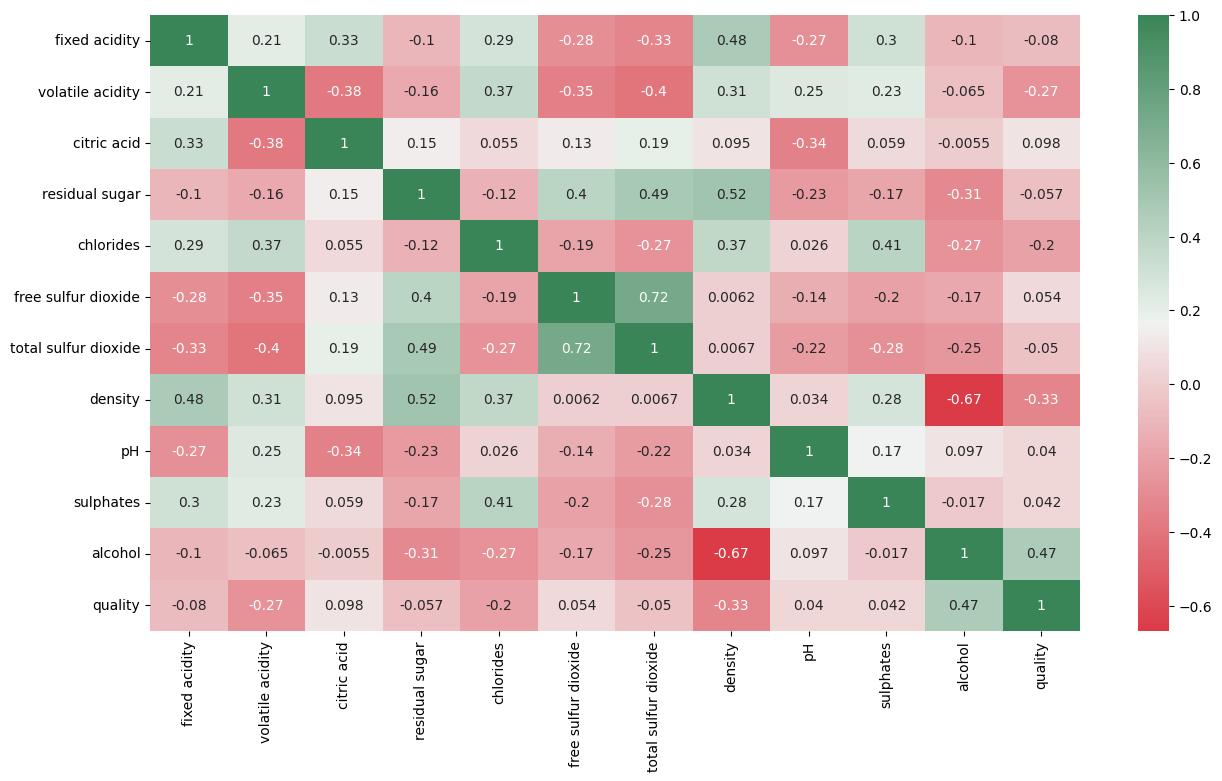

In [ ]:
cmap = sns.diverging_palette(10, 500, as_cmap=True)
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), cmap=cmap, annot=True)

We can see there is multicollinearity between our columns. and the highest ones is betweeen `free sulfur dioxide` and `total sulfur dioxide`.

these are in the least correlated features with our target variable. we can safely drop one of them:

In [ ]:
X.drop('free sulfur dioxide', axis=1, inplace=True)

#### New heatmap

<Axes: >

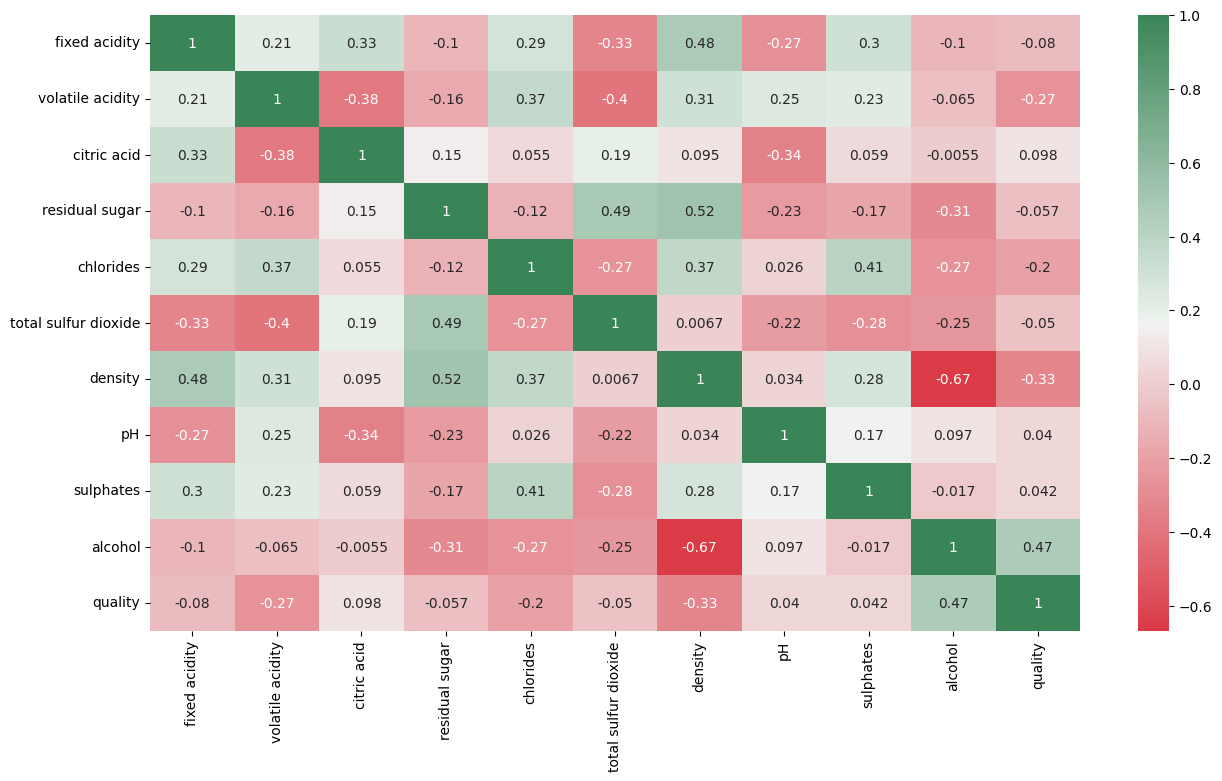

In [ ]:
cmap = sns.diverging_palette(10, 500, as_cmap=True)
plt.figure(figsize=(15, 8))
sns.heatmap(data.drop('free sulfur dioxide', axis=1).corr(), cmap=cmap, annot=True)

## Cuting y

Let's first look at the value counts of the target variable:

In [ ]:
y.value_counts(normalize=True).sort_index()*100

3     0.563910
4     3.872180
5    32.932331
6    43.665414
7    16.090226
8     2.781955
9     0.093985
Name: quality, dtype: float64

There are 7 quality number \[3-9\]. And it's imbalanced.
43% of our wines have the score of 6. and 32% percent are 5.

### Bar charts

<Axes: >

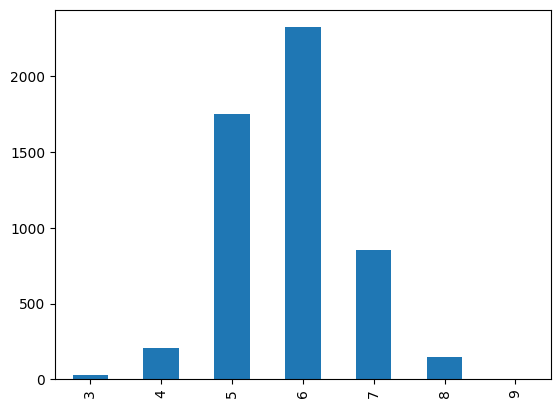

In [ ]:
y.value_counts().sort_index().plot.bar()

Use `pd.cut()` method to cut it into two split. one from 0 to 6, The next from 7 to 10:

<Axes: >

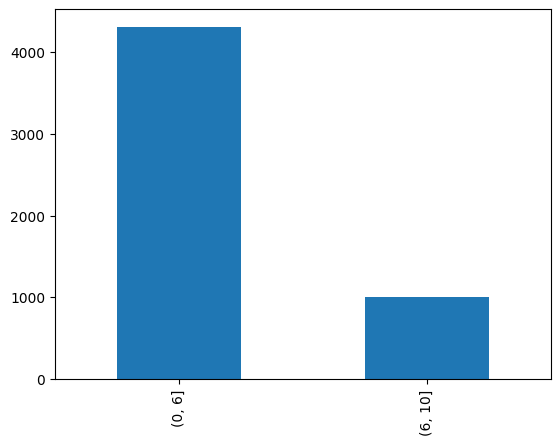

In [ ]:
bins = pd.IntervalIndex.from_tuples([(0, 6), (6, 10)])
pd.cut(y, bins=bins).value_counts().plot.bar()

it's still imbalanced but we can work this out with class weights and under/over sampling.

Change our y variable:

In [ ]:
y = pd.cut(y, bins=bins)

Now it looks like this:

In [ ]:
y

0        (0, 6]
1        (0, 6]
2        (0, 6]
3        (0, 6]
4        (0, 6]
         ...   
5315     (0, 6]
5316     (0, 6]
5317     (0, 6]
5318    (6, 10]
5319     (0, 6]
Name: quality, Length: 5320, dtype: category
Categories (2, interval[int64, right]): [(0, 6] < (6, 10]]

It's distribution is this:

In [ ]:
y.value_counts(normalize=True)*100

(0, 6]     81.033835
(6, 10]    18.966165
Name: quality, dtype: float64

81 percent of our wines are bad/moderate. 19 percent is Good/Exelent wines.

Our objective again to find the most of them and the ones we find have to be really good wines.

The bar chart of newly distributed quality with the respect of colors:

<Axes: xlabel='color', ylabel='count'>

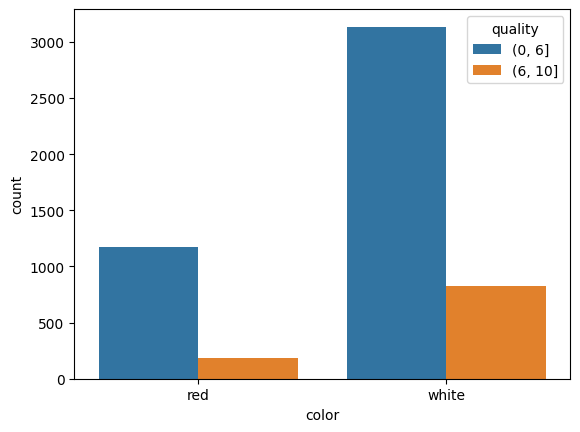

In [ ]:
sns.countplot(x=data['color'], hue=y)

# Spliting

In [ ]:
from sklearn.model_selection import train_test_split
rs = 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs, stratify=y)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(5320, 11) (3724, 11) (1596, 11)


# Preprocessing

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, RobustScaler

## Selecting the best scaler

As we can see standard scaler is not the best here because we have many outliters:

In [ ]:
ss = StandardScaler()
pd.DataFrame(ss.fit_transform(X.iloc[:, :-1]), columns=X.columns[:-1]).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5320.0,3.205456e-16,1.000094,-2.588145,-0.617772,-0.163070,0.367415,6.581671
volatile acidity,5320.0,-6.410912e-17,1.000094,-1.570028,-0.678405,-0.262314,0.391543,7.346207
citric acid,5320.0,2.671213e-17,1.000094,-2.164515,-0.533454,-0.057728,0.553919,9.116989
residual sugar,5320.0,0.000000e+00,1.000094,-0.988604,-0.721923,-0.521912,0.544812,13.501067
chlorides,5320.0,1.282182e-16,1.000094,-1.293816,-0.507052,-0.262884,0.252582,15.038318
total sulfur dioxide,5320.0,-8.547883e-17,1.000094,-1.904371,-0.706532,0.033310,0.689479,5.740662
density,5320.0,1.857027e-14,1.000094,-2.504125,-0.787562,0.038682,0.753636,14.988637
pH,5320.0,6.197215e-16,1.000094,-3.146985,-0.715020,-0.091439,0.656858,4.897208
sulphates,5320.0,-2.136971e-17,1.000094,-2.092831,-0.690295,-0.155996,0.445090,9.795325
alcohol,5320.0,6.624609e-16,1.000094,-2.149768,-0.884822,-0.125855,0.717443,3.668983


But robust scaler does a better job:

In [ ]:
rb_s = RobustScaler()
pd.DataFrame(rb_s.fit_transform(X.iloc[:, :-1]), columns=X.columns[:-1]).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5320.0,0.165522,1.015131,-2.461538,-0.461538,0.000000e+00,0.538462,6.846154
volatile acidity,5320.0,0.245165,0.934713,-1.222222,-0.388889,0.000000e+00,0.611111,7.111111
citric acid,5320.0,0.053090,0.919733,-1.937500,-0.437500,0.000000e+00,0.562500,8.437500
residual sugar,5320.0,0.412014,0.789505,-0.368421,-0.157895,0.000000e+00,0.842105,11.070175
chlorides,5320.0,0.346066,1.316547,-1.357143,-0.321429,0.000000e+00,0.678571,20.142857
total sulfur dioxide,5320.0,-0.023861,0.716394,-1.388013,-0.529968,0.000000e+00,0.470032,4.088328
density,5320.0,-0.025099,0.648907,-1.649891,-0.536105,-1.214653e-14,0.463895,9.700219
pH,5320.0,0.066652,0.728996,-2.227273,-0.454545,0.000000e+00,0.545455,3.636364
sulphates,5320.0,0.137395,0.880841,-1.705882,-0.470588,0.000000e+00,0.529412,8.764706
alcohol,5320.0,0.078548,0.624175,-1.263158,-0.473684,0.000000e+00,0.526316,2.368421


And combining robust scaler with power transformer, so we scale first then transform the data to a more normalize data:

In [ ]:
pd.DataFrame(pt.fit_transform(rb_s.fit_transform(X.iloc[:, :-1])), columns=X.columns[:-1]).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5320.0,-4.273941e-17,1.000094,-5.005068,-0.595644,0.040069,0.591857,3.506098
volatile acidity,5320.0,2.136971e-17,1.000094,-2.956318,-0.692081,-0.001366,0.699345,3.004290
citric acid,5320.0,-1.602728e-17,1.000094,-2.357500,-0.506226,-0.010650,0.586605,7.421304
residual sugar,5320.0,4.273941e-17,1.000094,-1.781805,-0.843315,-0.327237,0.969687,2.320538
chlorides,5320.0,0.000000e+00,1.000094,-4.144238,-0.648745,-0.034786,0.740855,3.446947
total sulfur dioxide,5320.0,0.000000e+00,1.000094,-1.914281,-0.704849,0.037359,0.691440,5.658291
density,5320.0,4.273941e-17,1.000094,-2.738502,-0.779969,0.083399,0.775456,11.421825
pH,5320.0,-2.136971e-17,1.000094,-3.740642,-0.693919,-0.025211,0.696260,4.020565
sulphates,5320.0,0.000000e+00,1.000094,-3.459541,-0.699359,0.032951,0.643888,4.476311
alcohol,5320.0,-5.342427e-17,1.000094,-2.927151,-0.903580,0.027378,0.810440,2.633778


## Column transformers

So we use a column transformer to first encode `color` columns and scale the numerical features:

In [ ]:
categorical_features = [X.columns[-1]]
numerical_features = X.columns[:-1].values

encode_scale = make_column_transformer(
    (OneHotEncoder(sparse_output=False, drop='if_binary'), categorical_features),
    (RobustScaler(), numerical_features),
    verbose_feature_names_out=False,
)

Then transform the numerical features:

In [ ]:
normalization_after_encode_scale = make_column_transformer(
    (PowerTransformer(), slice(1, None)),
    remainder='passthrough',
    verbose_feature_names_out=False,
)

## Encoding y

In [ ]:
from sklearn.preprocessing import LabelEncoder

We use a label encoder to encode our target variable to be 0 and 1:

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
y_test = le.transform(y_test)

In [ ]:
le.classes_

array([Interval(0, 6, closed='right'), Interval(6, 10, closed='right')],
      dtype=object)

# Building models

## Utilities

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, fbeta_score, make_scorer

We create some functions to report how much a model is good. and another one to make and fit a pipeline based on that model:

In [ ]:
def model_reports(model, X_train, X_test, y_train, y_test, label_names=le.classes_):
    print(f"Score on test set: {model.score(X_test, y_test)}\n", f"Score on training set: {model.score(X_train, y_train)}")
    print(classification_report(y_test, model.predict(X_test)))
    print(f"f0.5-score:{fbeta_score(beta=0.5, y_true=y_test, y_pred=model.predict(X_test))}")

    disp = ConfusionMatrixDisplay.from_estimator(estimator=model,
                                        X=X_test, y=y_test,
                                        display_labels=label_names)

I used `fbeta score` with `beta=0.5` because i care about precision more than recal. (I care about not predicting a bad wine to be good, more than finding all the good wines)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
def make_fit_pipeline(model, X_train, y_train):
    pipeline = Pipeline([
        ('Encoder_Scaler', encode_scale),
        ('Normalizer', normalization_after_encode_scale),
        ('Classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    return pipeline

Our scoring function will be f0.5-score too:

In [ ]:
scoring=make_scorer(fbeta_score, beta=0.5)

## Logistic Regression

Score on test set: 0.8208020050125313
 Score on training set: 0.8257250268528464
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      1293
           1       0.55      0.30      0.39       303

    accuracy                           0.82      1596
   macro avg       0.70      0.62      0.64      1596
weighted avg       0.79      0.82      0.80      1596

f0.5-score:0.47120418848167533


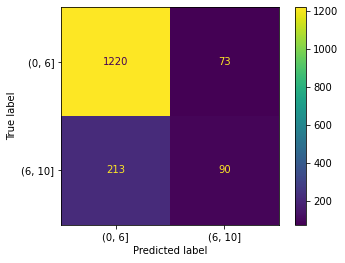

In [ ]:
logistic_pipe = make_fit_pipeline(LogisticRegression(random_state=rs, max_iter=100_000), X_train, y_train)
model_reports(logistic_pipe, X_train, X_test, y_train, y_test)

#### Results

Good accuracy but not much of a good f-score. This model had a problem finding all the good wines. It found only around 30% of them. But better precision. 55% of it's prediction of good wines are correct.

### Grid Search

Lets use a grid search to see if we can find better hyper-parameters:

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Score on test set: 0.8157894736842105
 Score on training set: 0.8203544575725027
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1293
           1       0.52      0.45      0.48       303

    accuracy                           0.82      1596
   macro avg       0.70      0.67      0.68      1596
weighted avg       0.81      0.82      0.81      1596

f0.5-score:0.5011135857461024


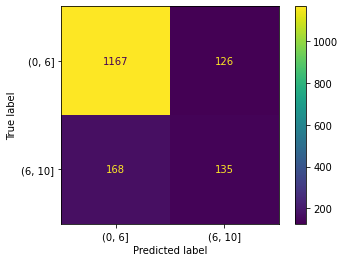

In [ ]:
param_grid = [
    {
        'Classifier__penalty': ['l1'],
        'Classifier__C': [0.5, 1, 1.5, 2, 10],
        'Classifier__class_weight': [{0:0.4, 1:0.6}, {0:0.2, 1:0.8}, {0:0.1, 1:0.9}, 'balanced'],
        'Classifier__solver': ['saga', 'liblinear']
    },
    {
        'Classifier__penalty': ['l2'],
        'Classifier__C': [0.5, 1, 1.5, 2, 10],
        'Classifier__class_weight': [{0:0.4, 1:0.6}, {0:0.2, 1:0.8}, {0:0.1, 1:0.9}, 'balanced'],
        'Classifier__solver': ['saga', 'lbfgs', 'liblinear', 'sag', 'newton-cholesky']
    },
    {
        'Classifier__penalty': ['elasticnet'],
        'Classifier__C': [0.5, 1, 1.5, 2, 10],
        'Classifier__class_weight': [{0:0.4, 1:0.6}, {0:0.2, 1:0.8}, {0:0.1, 1:0.9}, 'balanced'],
        'Classifier__solver': ['saga'],
        'Classifier__l1_ratio': np.linspace(0, 1, 5),
    }
]
logistic_search = GridSearchCV(estimator=logistic_pipe,
                               param_grid=param_grid,
                               verbose=1,
                               n_jobs=-1,
                               scoring=scoring)
logistic_search.fit(X_train, y_train)
best_logistic = logistic_search.best_estimator_
model_reports(best_logistic, X_train, X_test, y_train, y_test)

#### Results

It's f0.5-score got higher by 5%. Not bad. But still it had problem fiding all the good wines.

Its best parameters are:

In [ ]:
logistic_search.best_params_

{'Classifier__C': 1,
 'Classifier__class_weight': {0: 0.4, 1: 0.6},
 'Classifier__penalty': 'l1',
 'Classifier__solver': 'saga'}

And the best score it could get from 5 folds:

In [ ]:
scoring(best_logistic, X_test, y_test)

0.5011135857461024

Lets create a dictionary to record our models and their scores on test set:

In [ ]:
models_results = {'LR': (best_logistic, scoring(best_logistic, X_test, y_test))}

## SVC

In [ ]:
from sklearn.svm import SVC, LinearSVC

Score on test set: 0.8333333333333334
 Score on training set: 0.8469387755102041
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1293
           1       0.66      0.26      0.37       303

    accuracy                           0.83      1596
   macro avg       0.75      0.61      0.64      1596
weighted avg       0.81      0.83      0.80      1596

f0.5-score:0.5006418485237485


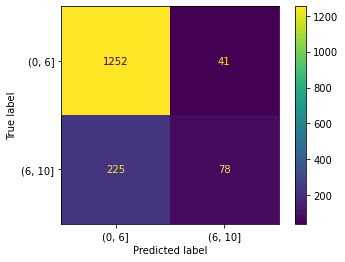

In [ ]:
svc_pipe = make_fit_pipeline(SVC(random_state=rs, kernel='rbf'), X_train, y_train)
model_reports(svc_pipe, X_train, X_test, y_train, y_test)

#### Results

Very bad recall. it does not predict many good wines. but out of it's predictions for good wine 66 percents of them are true.

### Grid Search

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Score on test set: 0.8339598997493735
 Score on training set: 0.8584854994629431
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1293
           1       0.58      0.47      0.52       303

    accuracy                           0.83      1596
   macro avg       0.73      0.70      0.71      1596
weighted avg       0.82      0.83      0.83      1596

f0.5-score:0.5521235521235522


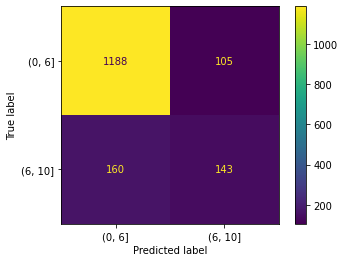

In [ ]:
param_grid = {
    'Classifier__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'Classifier__C': [0.1, 0.5, 1, 5],
    'Classifier__degree': [2, 3, 5, 8],
    'Classifier__class_weight': [{0:0.4, 1:0.6}, {0:0.2, 1:0.8}, 'balanced']
}
svc_search = GridSearchCV(estimator=svc_pipe,
                          param_grid=param_grid,
                          n_jobs=-1,
                          verbose=1,
                          scoring=scoring)
svc_search.fit(X_train, y_train)
model_reports(svc_search.best_estimator_, X_train, X_test, y_train, y_test)

#### Results

The best model until now. it predict 47 percent of the good wines, and 58 percent of its predictions for good wines are true.

In [ ]:
svc_search.best_params_

{'Classifier__C': 5,
 'Classifier__class_weight': {0: 0.4, 1: 0.6},
 'Classifier__degree': 2,
 'Classifier__kernel': 'rbf'}

In [ ]:
svc_search.best_score_

0.5429046186317956

In [ ]:
best_svc = svc_search.best_estimator_

In [ ]:
models_results['SVC'] = (best_svc, scoring(best_svc, X_test, y_test))

## Linear SVC

Score on test set: 0.8195488721804511
 Score on training set: 0.8225026852846402
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1293
           1       0.53      0.43      0.48       303

    accuracy                           0.82      1596
   macro avg       0.70      0.67      0.68      1596
weighted avg       0.81      0.82      0.81      1596

f0.5-score:0.5073586367157242


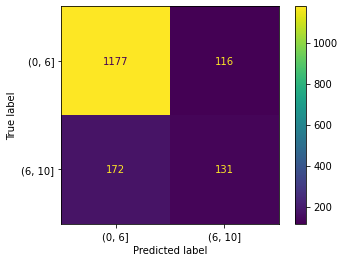

In [ ]:
lin_svc_pipe = make_fit_pipeline(LinearSVC(random_state=rs, max_iter=100_000, class_weight={0:0.4, 1:0.6}), X_train, y_train)
model_reports(lin_svc_pipe, X_train, X_test, y_train, y_test)

### Grid Search

Fitting 5 folds for each of 56 candidates, totalling 280 fits
Score on test set: 0.8233082706766918
 Score on training set: 0.8227712137486574
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1293
           1       0.54      0.45      0.49       303

    accuracy                           0.82      1596
   macro avg       0.71      0.68      0.69      1596
weighted avg       0.81      0.82      0.82      1596

f0.5-score:0.5202754399387911


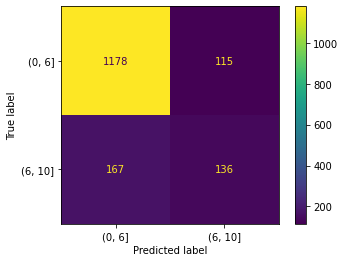

In [ ]:
param_grid = [{
    'Classifier__penalty': ['l2'],
    'Classifier__loss': ['hinge'],
    'Classifier__C': [0.01, 0.1, 0.5, 1, 5, 10, 100],
    'Classifier__class_weight': [{0:0.4, 1:0.6}, {0:0.2, 1:0.8}, {0:0.1, 1:0.9}, 'balanced']
},
{
    'Classifier__penalty': ['l1'],
    'Classifier__loss': ['squared_hinge'],
    'Classifier__dual': [False],
    'Classifier__C': [0.01, 0.1, 0.5, 1, 5, 10, 100],
    'Classifier__class_weight': [{0:0.4, 1:0.6}, {0:0.2, 1:0.8}, {0:0.1, 1:0.9}, 'balanced']
}]
lin_svc_search = GridSearchCV(estimator=lin_svc_pipe,
                          param_grid=param_grid,
                          n_jobs=-1,
                          verbose=1,
                          scoring=scoring)
lin_svc_search.fit(X_train, y_train)
model_reports(lin_svc_search.best_estimator_, X_train, X_test, y_train, y_test)

#### Results

Better than logistic regression but worse than SVC with 'rbf' kernel.

In [ ]:
best_lin_svc = lin_svc_search.best_estimator_

In [ ]:
models_results['LinearSVC'] = (best_lin_svc, scoring(best_lin_svc, X_test, y_test))

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Score on test set: 0.7819548872180451
 Score on training set: 1.0
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1293
           1       0.43      0.48      0.45       303

    accuracy                           0.78      1596
   macro avg       0.65      0.66      0.66      1596
weighted avg       0.79      0.78      0.79      1596

f0.5-score:0.44036697247706424


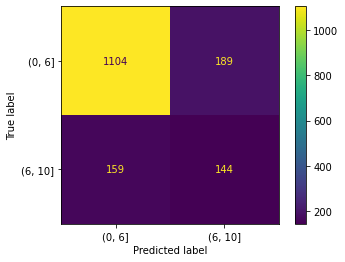

In [ ]:
dt_pipe = make_fit_pipeline(DecisionTreeClassifier(random_state=rs), X_train, y_train)
model_reports(dt_pipe, X_train, X_test, y_train, y_test)

### Grid Search

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Score on test set: 0.8120300751879699
 Score on training set: 0.8751342642320086
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1293
           1       0.51      0.43      0.47       303

    accuracy                           0.81      1596
   macro avg       0.69      0.67      0.68      1596
weighted avg       0.80      0.81      0.81      1596

f0.5-score:0.4891710231516057


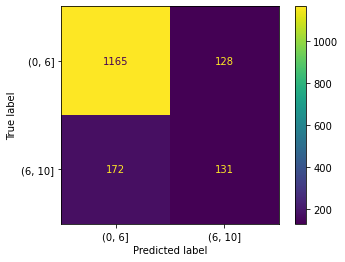

In [ ]:
param_grid = {
    'Classifier__max_depth': [10, 15, 20, 25, None],
    'Classifier__max_features': ['sqrt', 'log2', 5, 2, None],
    'Classifier__class_weight': [{0:0.4, 1:0.6}, {0:0.5, 1:0.5}, None, 'balanced'],
    'Classifier__min_samples_leaf': [2, 3, 4, 5, 7, 9]
}
dt_search = GridSearchCV(estimator=dt_pipe,
                         param_grid=param_grid,
                         n_jobs=-1,
                         verbose=1,
                         scoring=scoring)
dt_search.fit(X_train, y_train)
model_reports(dt_search.best_estimator_, X_train, X_test, y_train, y_test)

#### Results

Decision Tree did not do a good job finding all the good wines and predicting them correctly. The worst model until now.

In [ ]:
best_dt = dt_search.best_estimator_
models_results['DT'] = (best_dt, scoring(best_dt, X_test, y_test))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Score on test set: 0.843358395989975
 Score on training set: 1.0
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1293
           1       0.65      0.37      0.47       303

    accuracy                           0.84      1596
   macro avg       0.76      0.66      0.69      1596
weighted avg       0.83      0.84      0.83      1596

f0.5-score:0.5678391959798994


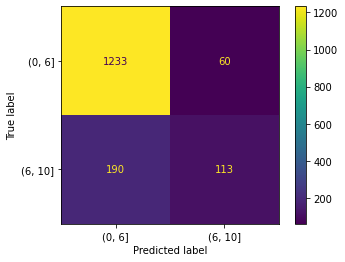

In [ ]:
rf_pipe = make_fit_pipeline(RandomForestClassifier(random_state=rs, n_estimators=100), X_train, y_train)
model_reports(rf_pipe, X_train, X_test, y_train, y_test)

#### Results

The default random forest do a good job predicting good wines correctly but did not predict many of them. only 37% of them.

### Grid Search

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Score on test set: 0.8421052631578947
 Score on training set: 1.0
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1293
           1       0.65      0.37      0.47       303

    accuracy                           0.84      1596
   macro avg       0.76      0.66      0.69      1596
weighted avg       0.82      0.84      0.82      1596

f0.5-score:0.5633100697906281


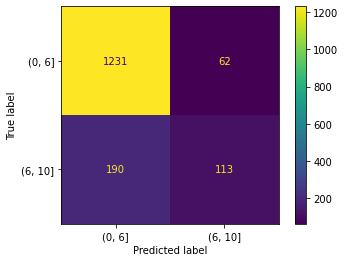

In [ ]:
param_grid = {
    'Classifier__n_estimators': [10, 20, 40, 60, 100, 200],
    'Classifier__max_depth': [10, 15, 20, 25, None],
    'Classifier__max_features': ['sqrt', 'log2', 5, 2],
    'Classifier__class_weight': [{0:0.4, 1:0.6}, {0:0.5, 1:0.5}, None, 'balanced']
}
rf_search = GridSearchCV(estimator=rf_pipe,
                         param_grid=param_grid,
                         n_jobs=-1,
                         verbose=1,
                         scoring=scoring)
rf_search.fit(X_train, y_train)
model_reports(rf_search.best_estimator_, X_train, X_test, y_train, y_test)

#### Results

Random forest with hyper-parameter tunning gives the same result. and it's actually the best model so far based on our scoring. Because we care about precision two times more than recall of predicting good wines.

**We want to avoid predicting bad wines as good!**

In [ ]:
rf_search.best_params_

{'Classifier__class_weight': {0: 0.5, 1: 0.5},
 'Classifier__max_depth': 25,
 'Classifier__max_features': 'sqrt',
 'Classifier__n_estimators': 200}

In [ ]:
rf_search.best_score_

0.5723787721209356

In [ ]:
best_rf = rf_search.best_estimator_

In [ ]:
models_results['RF'] = (best_rf, scoring(best_rf, X_test, y_test))

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Score on test set: 0.8408521303258145
 Score on training set: 1.0
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1293
           1       0.62      0.41      0.50       303

    accuracy                           0.84      1596
   macro avg       0.75      0.68      0.70      1596
weighted avg       0.82      0.84      0.83      1596

f0.5-score:0.5645889792231256


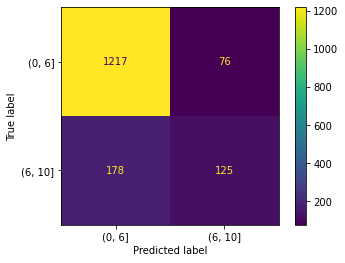

In [ ]:
knn_pipe = make_fit_pipeline(KNeighborsClassifier(n_neighbors=13, weights='distance'), X_train, y_train)
model_reports(knn_pipe, X_train, X_test, y_train, y_test)

#### Results

KNN did a better job based on our scoring on our test set!

### Grid Search

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Score on test set: 0.8408521303258145
 Score on training set: 1.0
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1293
           1       0.62      0.41      0.50       303

    accuracy                           0.84      1596
   macro avg       0.75      0.68      0.70      1596
weighted avg       0.82      0.84      0.83      1596

f0.5-score:0.5645889792231256


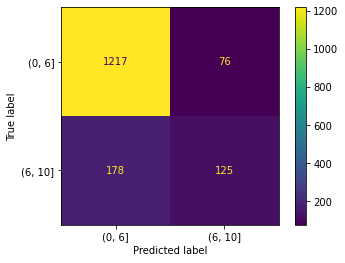

In [ ]:
param_grid = {
    'Classifier__n_neighbors': [3, 5, 7, 8, 9, 10, 11, 12, 13, 15, 17, 21],
    'Classifier__weights': ['uniform', 'distance'],
    'Classifier__p': [1, 2]
}
knn_search = GridSearchCV(estimator=knn_pipe,
                          param_grid=param_grid,
                          n_jobs=-1,
                          verbose=1,
                          scoring=scoring)
knn_search.fit(X_train, y_train)
model_reports(knn_search.best_estimator_, X_train, X_test, y_train, y_test)

#### Results

The best model based on our test set so far is KNN! but only 0.12% better lets look at its score on 5 folds:

In [ ]:
knn_search.best_score_

0.5567235087805112

Based on this random forest is still better. 2% better.

In [ ]:
knn_search.best_params_

{'Classifier__n_neighbors': 13,
 'Classifier__p': 2,
 'Classifier__weights': 'distance'}

In [ ]:
best_knn = knn_search.best_estimator_

In [ ]:
models_results['KNN'] = (best_knn, scoring(best_knn, X_test, y_test))

## XGBoost

In [ ]:
from xgboost import XGBClassifier

Score on test set: 0.8345864661654135
 Score on training set: 0.9989258861439313
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1293
           1       0.59      0.43      0.49       303

    accuracy                           0.83      1596
   macro avg       0.73      0.68      0.70      1596
weighted avg       0.82      0.83      0.82      1596

f0.5-score:0.5470737913486006


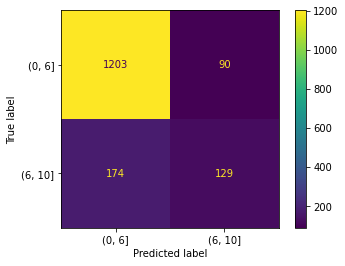

In [ ]:
xgb_pipe = make_fit_pipeline(XGBClassifier(), X_train, y_train)
model_reports(xgb_pipe, X_train, X_test, y_train, y_test)

### Grid Search

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Score on test set: 0.8408521303258145
 Score on training set: 0.9903329752953813
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1293
           1       0.62      0.43      0.51       303

    accuracy                           0.84      1596
   macro avg       0.75      0.68      0.71      1596
weighted avg       0.83      0.84      0.83      1596

f0.5-score:0.5666957279860506


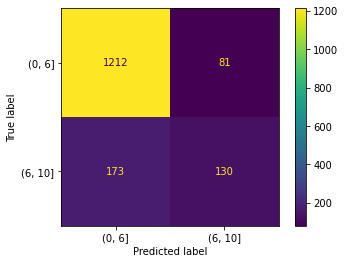

In [ ]:
param_grid = {
    'Classifier__n_estimators': [150, 200, 210, 230, 250],
    'Classifier__eta': [0.01, 0.1, 1, None]
}
xgb_search = GridSearchCV(estimator=xgb_pipe,
                         param_grid=param_grid,
                         n_jobs=-1,
                         verbose=1,
                          scoring=scoring)
xgb_search.fit(X_train, y_train)
model_reports(xgb_search.best_estimator_, X_train, X_test, y_train, y_test)

#### Results

XGboost is 0.33% better than RF. But lets look at the cross validation of 5 folds score:

In [ ]:
xgb_search.best_score_

0.542700096865754

Random forest did a better job by 3%!

In [ ]:
xgb_search.best_params_

{'Classifier__eta': 0.1, 'Classifier__n_estimators': 210}

In [ ]:
best_xgb = xgb_search.best_estimator_
models_results['XGB'] = (best_xgb, scoring(best_xgb, X_test, y_test))

## RF With Under Sampling

Now lets try using under sampling methods to see if we can beat our highest score:

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
under_sampler = RandomUnderSampler(random_state=rs)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

Counts of 0's and 1's in the target variable in training set is the same:

<Axes: ylabel='count'>

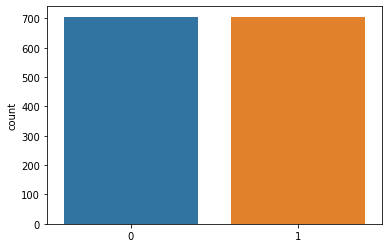

In [ ]:
sns.countplot(x=y_train_under)

we create a encoder column transformer to one hot encode our `color` column:

In [ ]:
encode = make_column_transformer(
    (OneHotEncoder(sparse_output=False, drop='if_binary'), categorical_features),
    verbose_feature_names_out=False,
    remainder='passthrough',
)

Fit and transform it on undersampled training set:

Also transform test set:

In [ ]:
X_train_under_enc = encode.fit_transform(X_train_under, y_train_under)
X_test_enc = encode.transform(X_test)

Score on test set: 0.7387218045112782
 Score on training set: 1.0
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      1293
           1       0.41      0.81      0.54       303

    accuracy                           0.74      1596
   macro avg       0.67      0.77      0.68      1596
weighted avg       0.84      0.74      0.76      1596

f0.5-score:0.450533284295697


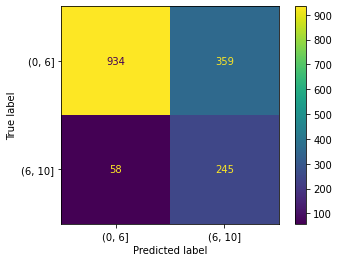

In [ ]:
rf_under = RandomForestClassifier(random_state=rs).fit(X_train_under_enc, y_train_under)
model_reports(rf_under, X_train_under_enc, X_test_enc, y_train_under, y_test)

#### Results

Pretty bad results! The model is labeling 359 bad wines as good wines! It's only 41% precise!

But it does a pretty good job finding all the good wines as it found 81% of good wines!

### Grid Search

In [ ]:
param_grid = {
    'n_estimators': [10, 20, 40, 60, 100, 200],
    'max_depth': [10, 15, 20, 25, None],
    'max_features': ['sqrt', 'log2', 5, 2],
    'class_weight': [{0:0.4, 1:0.6}, {0:0.5, 1:0.5}, None, 'balanced']
}
rf_search_under = GridSearchCV(estimator=rf_under,
                         param_grid=param_grid,
                         n_jobs=-1,
                         verbose=1,
                         scoring=scoring)
rf_search_under.fit(X_train_under_enc, y_train_under)

Score on test set: 0.7380952380952381
 Score on training set: 0.9992917847025495
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1293
           1       0.40      0.79      0.53       303

    accuracy                           0.74      1596
   macro avg       0.67      0.76      0.68      1596
weighted avg       0.84      0.74      0.76      1596

f0.5-score:0.44726052925829296


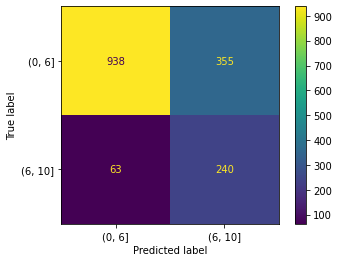

In [ ]:
model_reports(rf_search_under.best_estimator_, X_train_under_enc, X_test_enc, y_train_under, y_test)

#### Results

It's like before. Because we under sampled, recall of our good wine class got higher but it's not really precise about it!

In [ ]:
rf_search_under.best_score_

0.7590505245828192

Ok. This is a fake score. Why?

Because it's scoring with the undersampled X_train and y_train. So it's like we undersampled our dataset then spliting into train and test set. But that's just wrong, and it cause data leakage!

In [ ]:
best_rf_under = rf_search_under.best_estimator_

In [ ]:
models_results['RF-Undersampled'] = (best_rf_under, scoring(best_rf_under, X_test_enc, y_test))

## RF With Over Sampling

Now lets try over sampling with `SMOTE`:

In [ ]:
from imblearn.over_sampling import SMOTE

We need to first encode our training set then give it to `SMOTE` to resample it:

In [ ]:
X_train_enc = encode.fit_transform(X_train, y_train)
smo_sampler = SMOTE(random_state=rs)
X_train_smo, y_train_smo = smo_sampler.fit_resample(X_train_enc, y_train)

Also encode our test set:

In [ ]:
X_test_enc = encode.transform(X_test)

Score on test set: 0.8170426065162907
 Score on training set: 0.9957035445757251
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1293
           1       0.51      0.66      0.58       303

    accuracy                           0.82      1596
   macro avg       0.71      0.76      0.73      1596
weighted avg       0.84      0.82      0.83      1596

f0.5-score:0.5382967327262989


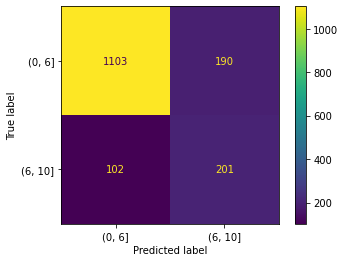

In [ ]:
rf_over = RandomForestClassifier(random_state=rs, n_estimators=50, max_depth=20)
rf_over.fit(X_train_smo, y_train_smo)
model_reports(rf_over, X_train_enc, X_test_enc, y_train, y_test)

### Grid Search

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Score on test set: 0.8214285714285714
 Score on training set: 0.9983888292158969
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1293
           1       0.53      0.59      0.56       303

    accuracy                           0.82      1596
   macro avg       0.71      0.73      0.72      1596
weighted avg       0.83      0.82      0.83      1596

f0.5-score:0.5385996409335727


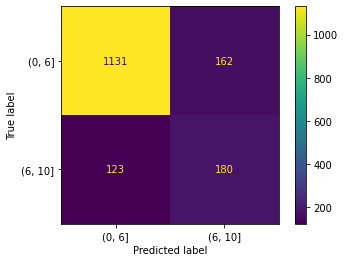

In [ ]:
param_grid = {
    'n_estimators': [10, 20, 40, 60, 100, 200],
    'max_depth': [10, 15, 20, 25, None],
    'max_features': ['sqrt', 'log2', 5, 2],
    'class_weight': [{0:0.4, 1:0.6}, {0:0.5, 1:0.5}, None, 'balanced']
}
rf_search_over = GridSearchCV(estimator=rf_over,
                         param_grid=param_grid,
                         n_jobs=-1,
                         verbose=1,
                         scoring=scoring)
rf_search_over.fit(X_train_smo, y_train_smo)
model_reports(rf_search_over.best_estimator_, X_train_enc, X_test_enc, y_train, y_test)

#### Results

The same result as the default parameters.

In [ ]:
best_rf_over = rf_search_over.best_estimator_
models_results['RF-Oversampled'] = (best_rf_over, scoring(best_rf_over, X_test_enc, y_test))

## Droping the color feature

Now I'm trying to see if droping the color column can help or not?

Let's see!

In [ ]:
X_train['color'].value_counts()

white    2768
red       956
Name: color, dtype: int64

In [ ]:
X_train_ = X_train.drop('color', axis=1)
X_test_ = X_test.drop('color', axis=1)

Score on test set: 0.8377192982456141
 Score on training set: 0.9395810955961332
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1293
           1       0.64      0.32      0.43       303

    accuracy                           0.84      1596
   macro avg       0.75      0.64      0.67      1596
weighted avg       0.82      0.84      0.82      1596

f0.5-score:0.5378704720087816


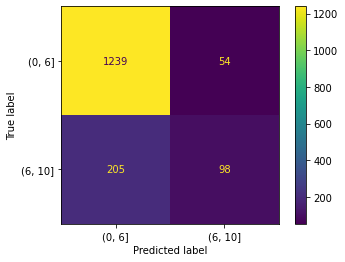

In [ ]:
rf_all = RandomForestClassifier(random_state=rs, n_estimators=40, max_depth=10)
rf_all.fit(X_train_, y_train)
model_reports(rf_all, X_train_, X_test_, y_train, y_test)

### Grid Search

In [ ]:
param_grid = {
    'n_estimators': [10, 20, 40, 60, 100, 200],
    'max_depth': [10, 15, 20, 25, None],
    'max_features': ['sqrt', 'log2', 5, 2],
    'class_weight': [{0:0.4, 1:0.6}, {0:0.5, 1:0.5}, None, 'balanced']
}
rf_search_all = GridSearchCV(estimator=rf_all,
                         param_grid=param_grid,
                         n_jobs=-1,
                         verbose=1,
                         scoring=scoring)
rf_search_all.fit(X_train_, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(estimator=RandomForestClassifier(max_depth=10, n_estimators=40,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 0.4, 1: 0.6}, {0: 0.5, 1: 0.5},
                                          None, 'balanced'],
                         'max_depth': [10, 15, 20, 25, None],
                         'max_features': ['sqrt', 'log2', 5, 2],
                         'n_estimators': [10, 20, 40, 60, 100, 200]},
             scoring=make_scorer(fbeta_score, beta=0.5), verbose=1)

In [ ]:
rf_search_all.best_params_

{'class_weight': {0: 0.4, 1: 0.6},
 'max_depth': 15,
 'max_features': 2,
 'n_estimators': 100}

Score on test set: 0.8402255639097744
 Score on training set: 0.9994629430719656
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1293
           1       0.65      0.35      0.45       303

    accuracy                           0.84      1596
   macro avg       0.75      0.65      0.68      1596
weighted avg       0.82      0.84      0.82      1596

f0.5-score:0.5526590198123045


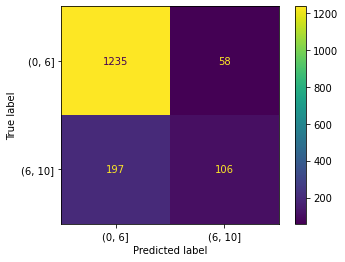

In [ ]:
model_reports(rf_search_all.best_estimator_, X_train_, X_test_, y_train, y_test)

Good Scores but still lower than RF with `color` columns atached!

In [ ]:
best_rf_all = rf_search_all.best_estimator_
models_results['RF-All'] = (best_rf_all, scoring(best_rf_all, X_test_, y_test))

## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

Score on test set: 0.8289473684210527
 Score on training set: 0.8834586466165414
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1293
           1       0.57      0.41      0.47       303

    accuracy                           0.83      1596
   macro avg       0.72      0.67      0.69      1596
weighted avg       0.81      0.83      0.82      1596

f0.5-score:0.5269922879177379


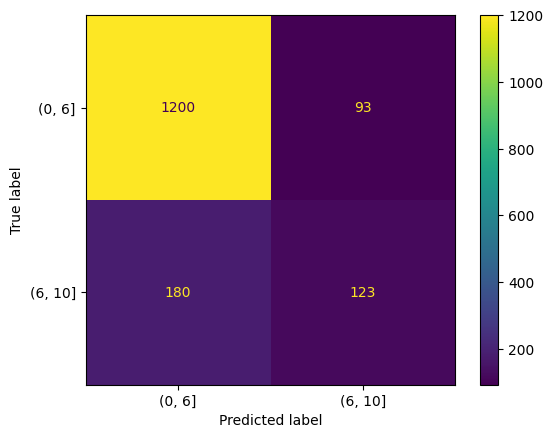

In [ ]:
mlp_pipe = make_fit_pipeline(MLPClassifier(max_iter=1000), X_train, y_train)
model_reports(mlp_pipe, X_train, X_test, y_train, y_test)

# THE RESULTS

Let's look at the results we got from our models!

<Axes: >

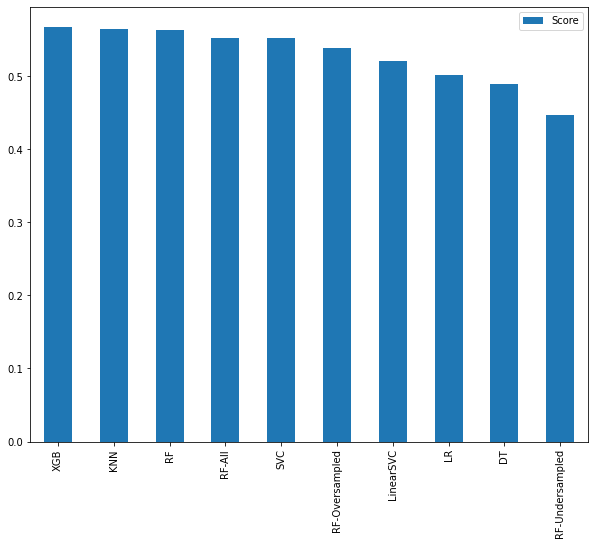

In [ ]:
pd.DataFrame(models_results, index=['Model', 'Score']).T.drop('Model', axis=1).sort_values(by='Score', ascending=False).plot.bar(figsize=(10, 8))

XGB and KNN Did a better job for f0.5-score on our test set. But remeber RF was better on cross validation scores!

# Feature Importances

Now that the best model is selected, We look at the most important features and their impact of wine quality.

In [ ]:
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

## On test set

In [ ]:
feature_importances = permutation_importance(best_rf,
                           X_test, y_test,
                           n_repeats=10,
                           random_state=rs,
                           n_jobs=-1)

In [ ]:
sorted_indices = feature_importances.importances_mean.argsort()

In [ ]:
feature_importances.importances_mean[sorted_indices]

array([-0.00100251,  0.00169173,  0.00444862,  0.00463659,  0.00538847,
        0.00601504,  0.00632832,  0.00639098,  0.00770677,  0.01453634,
        0.02675439])

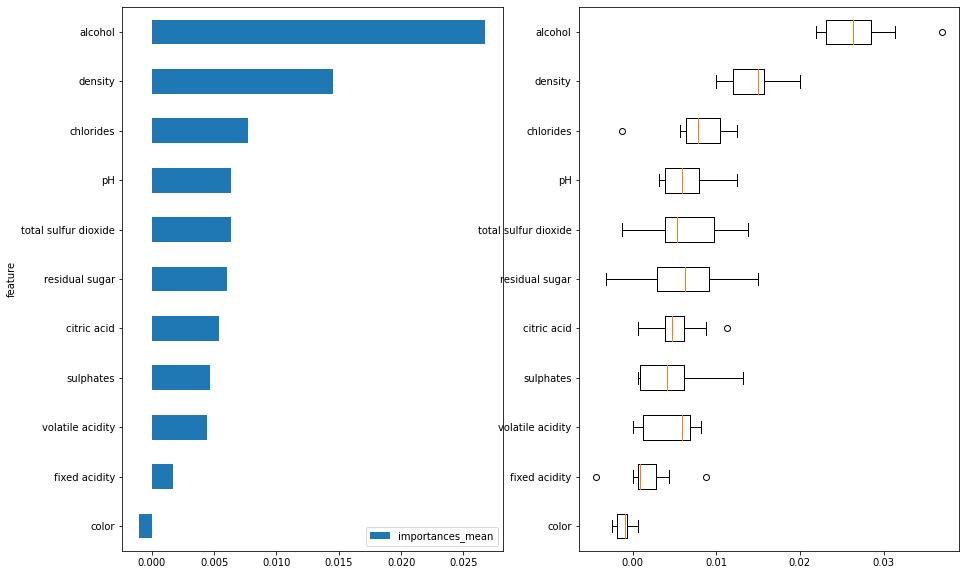

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
pd.DataFrame(zip(X_test.columns.values[sorted_indices], feature_importances.importances_mean[sorted_indices]),
             columns=['feature', 'importances_mean']).set_index('feature').plot.barh(ax=ax1)
ax2.boxplot(feature_importances.importances[sorted_indices].T, vert=False, labels=X_test.columns.values[sorted_indices]);

## On training set

In [ ]:
feature_importances = permutation_importance(best_rf,
                           X_train, y_train,
                           n_repeats=10,
                           random_state=rs,
                           n_jobs=-1)

In [ ]:
sorted_indices = feature_importances.importances_mean.argsort()

In [ ]:
feature_importances.importances_mean[sorted_indices]

array([0.        , 0.01952202, 0.03187433, 0.03332438, 0.03931257,
       0.04277658, 0.04334049, 0.04379699, 0.06570892, 0.08098818,
       0.12728249])

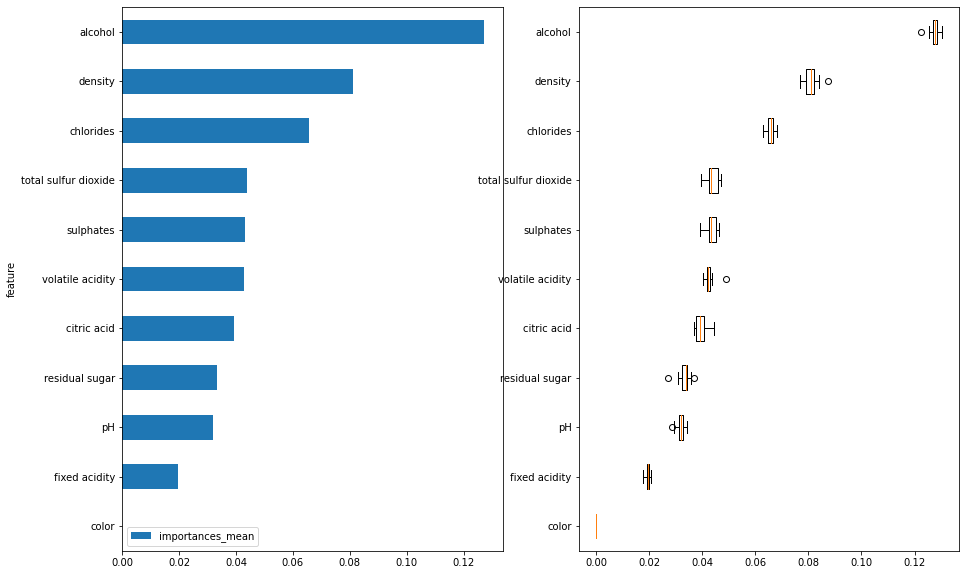

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
pd.DataFrame(zip(X_test.columns.values[sorted_indices], feature_importances.importances_mean[sorted_indices]),
             columns=['feature', 'importances_mean']).set_index('feature').plot.barh(ax=ax1)
ax2.boxplot(feature_importances.importances[sorted_indices].T, vert=False, labels=X_test.columns.values[sorted_indices]);

# PDP

Now look at the partial dependency plot to see what was the impact of 4 of our most important features on good wines!

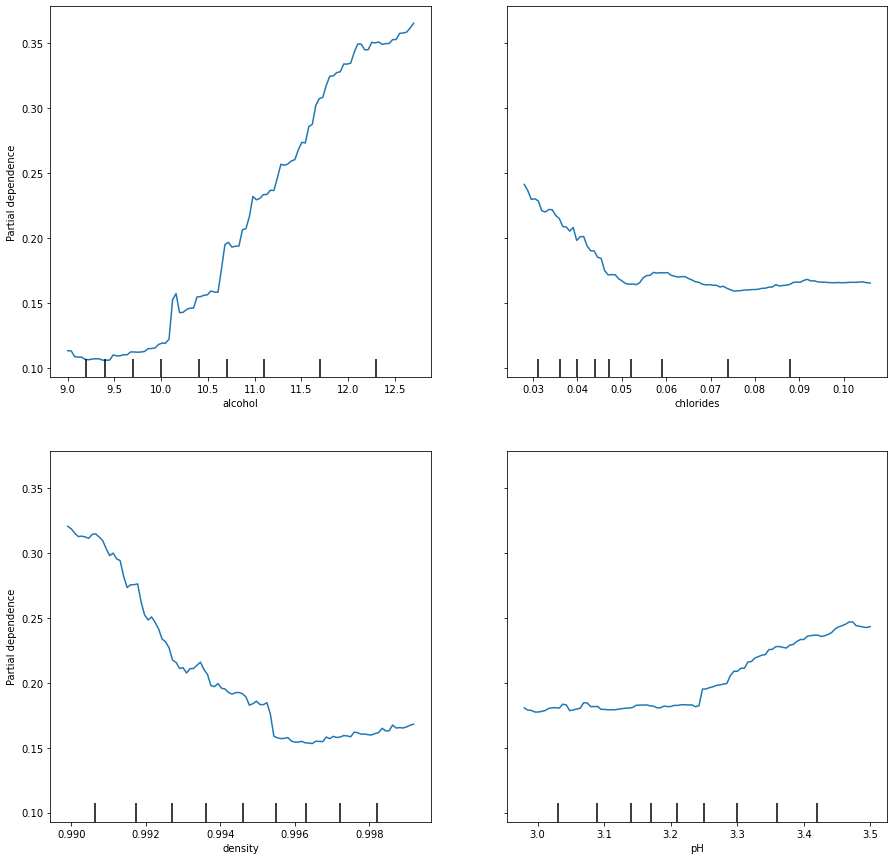

In [ ]:
important_features = ['alcohol', 'chlorides', 'density', 'pH']
_, axes = plt.subplots(2, 2, figsize=(15, 15))
PartialDependenceDisplay.from_estimator(
    estimator=rf_search.best_estimator_,
    X=X_train,
    target=1,
    features=important_features,
    random_state=rs,
    n_jobs=-1,
    ax=axes
)

The more alcohol get higher, the more a wine will be good!

Also for a wine to be good density and chlorides should probably be low.

# Next Steps

For our next steps we can try using other methods for balancing our data, also we can try stacking our best models see if we can get a better score.

Thank you!